# Covariance between consumption and permanent income over time
### By William Du

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#from HARK.ConsumptionSaving.ConsIndShockModel_MC_latest import IndShockConsumerType
   


In [22]:
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType


In [23]:
     
Harmenberg_Dict={
    # Parameters shared with the perfect foresight model
    "CRRA":2,                             # Coefficient of relative risk aversion
    "Rfree": 1.02**.25,                  # Interest factor on assets
    "DiscFac": 0.9935,                    # Intertemporal discount factor
    "LivPrb" : [.99375],                    # Survival probability
    "PermGroFac" :[1.00],                 # Permanent income growth factor

    # Parameters that specify the income distribution over the lifecycle
   
    "PermShkStd" :  [.06],     # Standard deviation of log permanent shocks to income
    "PermShkCount" : 5,                    # Number of points in discrete approximation to permanent income shocks
    "TranShkStd" : [.3],                   # Standard deviation of log transitory shocks to income
    "TranShkCount" : 5,                    # Number of points in discrete approximation to transitory income shocks
    "UnempPrb" : 0.07,                     # Probability of unemployment while working
    "IncUnemp" : 0.3,      # Unemployment benefits replacement rate
    "UnempPrbRet" : 0.0005,                # Probability of "unemployment" while retired
    "IncUnempRet" : 0.0,                   # "Unemployment" benefits when retired
    "T_retire" : 0,                        # Period of retirement (0 --> no retirement)
    "tax_rate" : 0.18,      # Flat income tax rate (legacy parameter, will be removed in future)

    # Parameters for constructing the "assets above minimum" grid
    "aXtraMin" : 0.001,                    # Minimum end-of-period "assets above minimum" value
    "aXtraMax" : 2000,                       # Maximum end-of-period "assets above minimum" value
    "aXtraCount" : 90,                     # Number of points in the base grid of "assets above minimum"
    "aXtraNestFac" : 4,                    # Exponential nesting factor when constructing "assets above minimum" grid
    "aXtraExtra" : [None],                 # Additional values to add to aXtraGrid

    # A few other parameters
    "BoroCnstArt" : 0.0,                   # Artificial borrowing constraint; imposed minimum level of end-of period assets
    "vFuncBool" : False,                    # Whether to calculate the value function during solution
    "CubicBool" : False,                   # Preference shocks currently only compatible with linear cFunc
    "T_cycle" : 1,                         # Number of periods in the cycle for this agent type

    # Parameters only used in simulation
    "AgentCount" : 200000,                 # Number of agents of this type
    "T_sim" : 1500,                         # Number of periods to simulate
    "aNrmInitMean" : np.log(1.25)-(.5**2)/2,# Mean of log initial assets
    "aNrmInitStd"  : .5,                   # Standard deviation of log initial assets
    "pLvlInitMean" : 0,                    # Mean of log initial permanent income
    "pLvlInitStd"  : 0,                    # Standard deviation of log initial permanent income
    "PermGroFacAgg" : 1.0,                 # Aggregate permanent income growth factor
    "T_age" : None,                        # Age after which simulated agents are automatically killed

}

# Run with PermGroFac = 1.0

In [24]:
fast = IndShockConsumerType(**Harmenberg_Dict, verbose = 1 )
fast.cycles = 0
GIC = ((fast.Rfree*fast.DiscFac)**(1/fast.CRRA))/fast.PermGroFac[0] # Make harmenberg but not szcheidle

print( 'RB**(1/rho) ' +str(GIC))
print('szeidl upper bound :' +str(np.exp((-fast.PermShkStd[0]**2) / 2) ))

fast.track_vars = ['cNrm','pLvl'] 
fast.solve()

fast.initialize_sim()
fast.simulate()

# Compute paths of aggregate consumption, assets and market resources

Asset_list = [] # path of aggregate assets
Consumption_list = [] # Path of aggregate consumption
M_list =[] # path of aggregate market resources

covariances =[]

for i in range (fast.T_sim):
    
    covariances.append(np.cov( fast.history['cNrm'][i] , fast.history['pLvl'][i] )[1][0]   )
    #Assetagg =  np.mean(fast.history['aNrm'][i]) # compute aggregate assets for period i
    #Asset_list.append(Assetagg)
    ConsAgg =  np.mean(fast.history['cNrm'][i] )# compute aggregate consumption for period i
    Consumption_list.append(ConsAgg)
    #Magg = np.mean(fast.history['mNrm'][i])# compute aggregate market resources for period i
   # M_list.append(Magg)
    


GPFRaw                 = 0.999215 
GPFNrm                 = 1.002446 
GPFAggLivPrb           = 0.992970 
Thorn = APF            = 0.999215 
PermGroFacAdj          = 0.996777 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.984108 
WRPF                   = 0.262239 
DiscFacGPFNrmMax       = 0.988657 
DiscFacGPFAggLivPrbMax = 1.001320 


RB**(1/rho) 0.999215028168601
szeidl upper bound :0.9982016190284373


# Plot of $C_{t}$ 

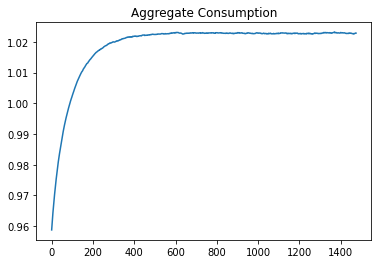

In [25]:
plt.plot(Consumption_list[25:])
plt.title('Aggregate Consumption')
plt.show()

# Plot of $Cov_{t}(c_{t},p_{t})$ over time

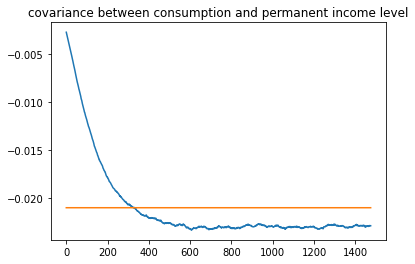

mean covariance between consumption and permanent income -0.02066801828201175


In [26]:
plt.plot(covariances[25:])# only consider period t=25 to t=200
plt.plot(np.mean(covariances[25:])*np.ones(len(covariances[25:])))
plt.title('covariance between consumption and permanent income level')
plt.show()

print('mean covariance between consumption and permanent income ' + str(np.mean(covariances)))


# Plot of $ \frac{Cov_{t+1}(c_{t+1},p_{t+1})}{ Cov_{t}(c_{t}, p_{t})}$ over time

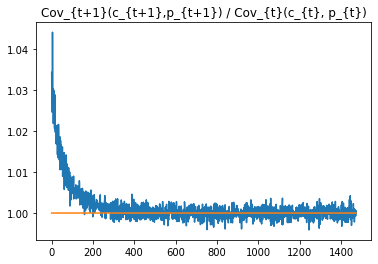

mean growth diff 1.0000452528936101


In [27]:
growth_diff = []
for i in range(len(covariances) -1):
    growth_diff.append( covariances[i+1]/covariances[i])
    
plt.plot(growth_diff[25:]) # only consider period t=25 to t=200
plt.plot(np.mean(growth_diff[400:])*np.ones(len(growth_diff[25:])))
plt.title('Cov_{t+1}(c_{t+1},p_{t+1}) / Cov_{t}(c_{t}, p_{t})')
plt.show()
    
    
print('mean growth diff ' + str(np.mean(growth_diff[400:])))

# Check If Equation 43 (in HTML) holds. (IF THEY HAVE CONSTANT GROWTH)

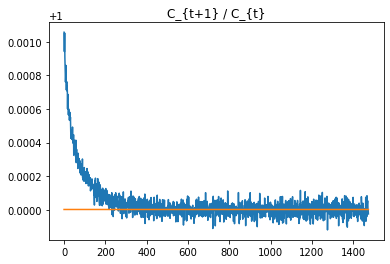

C_{t+1}/C_{t} = 1.000001142212374
omega_cov :1.0000452528936101
omega_cov / omega_c: 1.0000441106308524


In [28]:
C_growth_diff = []
for i in range(len(Consumption_list) -1):
    C_growth_diff.append( Consumption_list[i+1]/Consumption_list[i])
    
plt.plot(C_growth_diff[25:]) # only consider period t=25 to t=200
plt.plot(np.mean(C_growth_diff[400:])*np.ones(len(C_growth_diff[25:])))
plt.title('C_{t+1} / C_{t}')
plt.show()

print('C_{t+1}/C_{t} = ' + str(np.mean(C_growth_diff[400:])))

    

#Equation 43 in HTML

omega_c = np.mean(C_growth_diff[400:])

omega_cov = np.mean(growth_diff[400:])

print('omega_cov :' + str(omega_cov))
print('omega_cov / omega_c: ' + str(omega_cov / omega_c ))

# Run with PermGroFac = 1.02

In [29]:
fast = IndShockConsumerType(**Harmenberg_Dict, verbose = 1 )
fast.cycles = 0
fast.Rfree = 1.2**.25
fast.PermGroFac = [1.02]

GIC = ((fast.Rfree*fast.DiscFac)**(1/fast.CRRA))/fast.PermGroFac[0] # Make harmenberg but not szcheidle

print( 'RB**(1/rho)  / PermGroFac ' +str(GIC))
print('szeidl upper bound :' +str(np.exp((-fast.PermShkStd[0]**2) / 2) ))
fast.track_vars = ['cNrm','pLvl'] 
fast.solve()


fast.initialize_sim()
fast.simulate()

# Compute paths of aggregate consumption, assets and market resources

Asset_list = [] # path of aggregate assets
Consumption_list = [] # Path of aggregate consumption
M_list =[] # path of aggregate market resources

covariances =[]

for i in range (fast.T_sim):
    
    covariances.append(np.cov( fast.history['cNrm'][i] , fast.history['pLvl'][i] )[1][0]   )
    #Assetagg =  np.mean(fast.history['aNrm'][i]) # compute aggregate assets for period i
    #Asset_list.append(Assetagg)
    ConsAgg =  np.mean(fast.history['cNrm'][i] )# compute aggregate consumption for period i
    Consumption_list.append(ConsAgg)
    #Magg = np.mean(fast.history['mNrm'][i])# compute aggregate market resources for period i
    #M_list.append(Magg)
    

GPFRaw                 = 0.999727 
GPFNrm                 = 1.002960 
GPFAggLivPrb           = 0.993479 
Thorn = APF            = 1.019722 
PermGroFacAdj          = 1.016712 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.984108 
WRPF                   = 0.256965 
DiscFacGPFNrmMax       = 0.987645 
DiscFacGPFAggLivPrbMax = 1.000295 


RB**(1/rho)  / PermGroFac 0.9997269960802859
szeidl upper bound :0.9982016190284373


In [30]:
r_g = 1.2**.25 - 1 - .02

print(.15/r_g)

5.6316581562347094


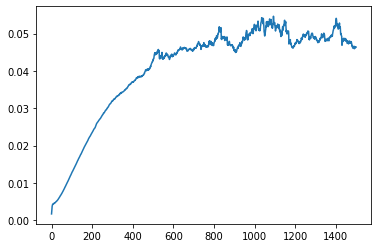

In [31]:
var_cNrm = []

for i in range(fast.T_sim):
    
    var_cNrm.append(np.std(fast.history['cNrm'][i])**2)
    
plt.plot(var_cNrm)
plt.show()

In [32]:

fast.check_conditions(verbose=True)



GPFRaw                 = 0.999727 
GPFNrm                 = 1.002960 
GPFAggLivPrb           = 0.993479 
Thorn = APF            = 1.019722 
PermGroFacAdj          = 1.016712 
uInvEpShkuInv          = 0.996777 
VAF                    = 0.984108 
WRPF                   = 0.256965 
DiscFacGPFNrmMax       = 0.987645 
DiscFacGPFAggLivPrbMax = 1.000295 


# Plot of $C_{t}$

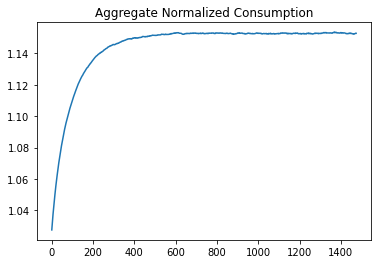

In [33]:
plt.plot(Consumption_list[25:])
plt.title('Aggregate Normalized Consumption')
plt.show()

In [34]:
np.mean(Consumption_list[200:])

1.1508352507162454

# Plot of $Cov_{t}(c_{t},p_{t})$ over time

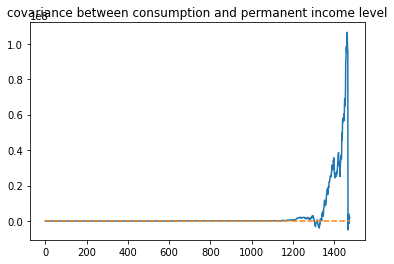

 covariance between consumption and permanent income 3037770.9077631016


In [35]:
plt.plot(covariances[25:])# only consider period t=25 to t=200
plt.plot(np.mean(covariances[25:1000])*np.ones(len(covariances[25:])), '--')
plt.title('covariance between consumption and permanent income level')
plt.show()

print(' covariance between consumption and permanent income ' + str(np.mean(covariances)))


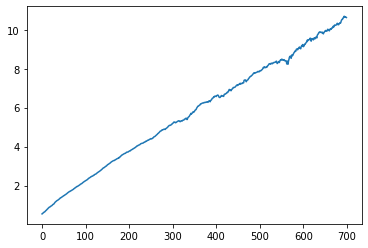

In [36]:
plt.plot(np.log(covariances[300:1000]))
plt.show()

# Plot of $ \frac{Cov_{t+1}(c_{t+1},p_{t+1})}{ Cov_{t}(c_{t}, p_{t})}$ over time

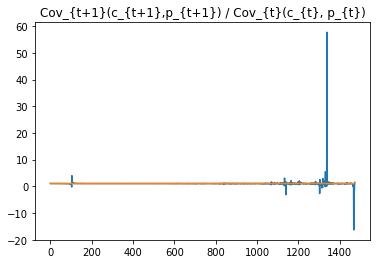

mean growth diff 1.0456253446450572


In [37]:
growth_diff = []
for i in range(len(covariances) -1):
    growth_diff.append( covariances[i+1]/covariances[i])
    
plt.plot(growth_diff[25:])# only consider period t=25 to t=200
plt.plot(np.mean(growth_diff[400:])*np.ones(len(growth_diff[25:])))
plt.title('Cov_{t+1}(c_{t+1},p_{t+1}) / Cov_{t}(c_{t}, p_{t})')
plt.show()
    
print('mean growth diff ' + str(np.mean(growth_diff[400:])))

# Check If Equation 43 (in HTML) holds.

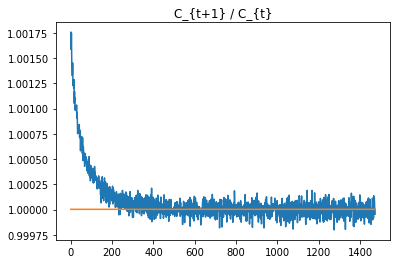

omega_c =1.0000028071671583
omega_cov 1.0456253446450572
omega_cov / omega_c = 1.0456224094081696


In [38]:
C_growth_diff = []
for i in range(len(Consumption_list) -1):
    C_growth_diff.append( Consumption_list[i+1]/Consumption_list[i])
    
plt.plot(C_growth_diff[25:])
plt.plot(np.mean(C_growth_diff[400:])*np.ones(len(C_growth_diff[25:])))
plt.title('C_{t+1} / C_{t}')
plt.show()

print('omega_c =' + str(np.mean(C_growth_diff[400:])))



#Equation 43 in HTML

omega_c = np.mean(C_growth_diff[400:])

omega_cov = np.mean(growth_diff[400:])

print('omega_cov ' + str(omega_cov))
print('omega_cov / omega_c = ' + str(omega_cov/ omega_c ))



In [39]:
omega_c

1.0000028071671583

In [40]:
omega_cov

1.0456253446450572